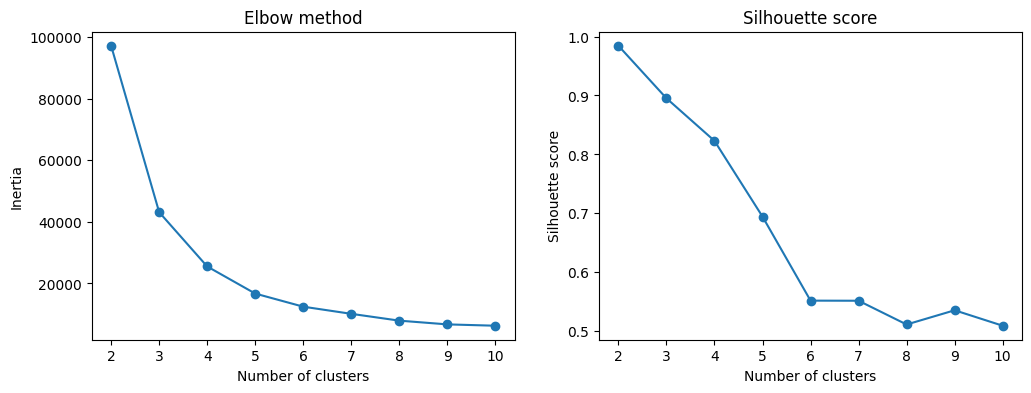

Silhouette score for test data: 0.6944469319082279
Rand index for test data: 0.0032942686688357784


In [3]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import re

# Read the dataset
dataset = pd.read_csv('Test.csv')

# Handle missing values in 'summary' and 'vote' columns
dataset['summary'].fillna('', inplace=True)
dataset['vote'].fillna(0, inplace=True)

# Text pre-processing function
def text_preprocessing(entry):
    entry = entry.lower()
    entry = re.sub(r'[^\w\s]', '', entry)
    entry = re.sub(r'\d+', '', entry)
    entry = re.sub(r'\s+', ' ', entry)
    words = entry.split()
    words = [word for word in words if len(word) > 2]
    return ' '.join(words)

# Define column transformer for text and other relevant variables, using Tfidf for the text and passthrough for vote
transformers = ColumnTransformer([
    ('text_transform', TfidfVectorizer(max_features = 1000, stop_words='english', ngram_range=(1,2), preprocessor=text_preprocessing), 'reviewText'),
    ('vote_transform', 'passthrough', ['vote'])
])

# Apply transformations to dataset
transformed_features = transformers.fit_transform(dataset[['reviewText', 'summary', 'verified', 'vote']])

# Find optimal number of clusters using elbow method and silhouette score
cluster_range = list(range(2, 11))
cluster_inertia = []
silhouette_vals = []

for i in cluster_range:
    kmeans_model = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans_model.fit(transformed_features)
    cluster_inertia.append(kmeans_model.inertia_)
    silhouette_vals.append(silhouette_score(transformed_features, kmeans_model.labels_))

# Plot elbow method and silhouette score to determine optimal number of clusters
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(cluster_range, cluster_inertia, marker="o")
axes[0].set_xlabel("Number of clusters")
axes[0].set_ylabel("Inertia")
axes[0].set_title("Elbow method")

axes[1].plot(cluster_range, silhouette_vals, marker="o")
axes[1].set_xlabel("Number of clusters")
axes[1].set_ylabel("Silhouette score")
axes[1].set_title("Silhouette score")

plt.show()

# Cluster reviews using KMeans
cluster_count = 5
kmeans_model = KMeans(n_clusters=cluster_count, random_state=42, n_init=10)
kmeans_model.fit(transformed_features)

# Predict product category labels for the dataset
dataset_labels = kmeans_model.predict(transformed_features)
dataset['predicted_labels'] = dataset_labels

# Evaluate clustering performance using silhouette score and Rand index
silhouette_sc = silhouette_score(transformed_features, dataset_labels, random_state=42)
rand_idx = adjusted_rand_score(dataset['category'], dataset_labels)

print('Silhouette score for test data:', silhouette_sc)
print('Rand index for test data:', rand_idx)


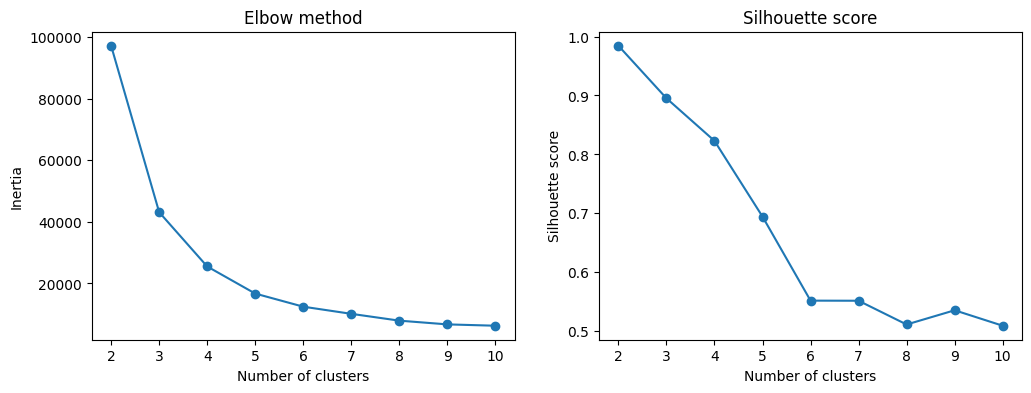

Silhouette score for test data: 0.6944469319082279
Rand index for test data: 0.0032942686688357784


In [4]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import re

# Read the dataset
dataset = pd.read_csv('Test.csv')

# Handle missing values in 'summary' and 'vote' columns
dataset['summary'].fillna('', inplace=True)
dataset['vote'].fillna(0, inplace=True)

# Text pre-processing function
def text_preprocessing(entry):
    entry = entry.lower()
    entry = re.sub(r'[^\w\s]', '', entry)
    entry = re.sub(r'\d+', '', entry)
    entry = re.sub(r'\s+', ' ', entry)
    words = entry.split()
    words = [word for word in words if len(word) > 2]
    return ' '.join(words)

# Define column transformer for text and other relevant variables, using Tfidf for the text and passthrough for vote
transformers = ColumnTransformer([
    ('text_transform', TfidfVectorizer(max_features = 1000, stop_words='english', ngram_range=(1,2), preprocessor=text_preprocessing), 'reviewText'),
    ('vote_transform', 'passthrough', ['vote'])
])

# Apply transformations to dataset
transformed_features = transformers.fit_transform(dataset[['reviewText', 'summary', 'verified', 'vote']])

# Find optimal number of clusters using elbow method and silhouette score
cluster_range = list(range(2, 11))
cluster_inertia = []
silhouette_vals = []

for i in cluster_range:
    kmeans_model = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans_model.fit(transformed_features)
    cluster_inertia.append(kmeans_model.inertia_)
    silhouette_vals.append(silhouette_score(transformed_features, kmeans_model.labels_))

# Plot elbow method and silhouette score to determine optimal number of clusters
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(cluster_range, cluster_inertia, marker="o")
axes[0].set_xlabel("Number of clusters")
axes[0].set_ylabel("Inertia")
axes[0].set_title("Elbow method")

axes[1].plot(cluster_range, silhouette_vals, marker="o")
axes[1].set_xlabel("Number of clusters")
axes[1].set_ylabel("Silhouette score")
axes[1].set_title("Silhouette score")

plt.show()

# Cluster reviews using KMeans
cluster_count = 5
kmeans_model = KMeans(n_clusters=cluster_count, random_state=42, n_init=10)
kmeans_model.fit(transformed_features)

# Predict product category labels for the dataset
dataset_labels = kmeans_model.predict(transformed_features)
dataset['predicted_labels'] = dataset_labels

# Evaluate clustering performance using silhouette score and Rand index
silhouette_sc = silhouette_score(transformed_features, dataset_labels, random_state=42)
rand_idx = adjusted_rand_score(dataset['category'], dataset_labels)

print('Silhouette score for test data:', silhouette_sc)
print('Rand index for test data:', rand_idx)
